# Code for K-Shape

In [1]:
from tslearn.generators import random_walks
from tslearn.preprocessing import TimeSeriesScalerMeanVariance
from tslearn.clustering.kshape import KShape
from tslearn.clustering.kmeans import TimeSeriesKMeans
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

/var/folders/f6/j9dzpvl55m18d0w261pm7lkm0000gn/T/ipykernel_43216/1892473972.py:11: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  fig.show()


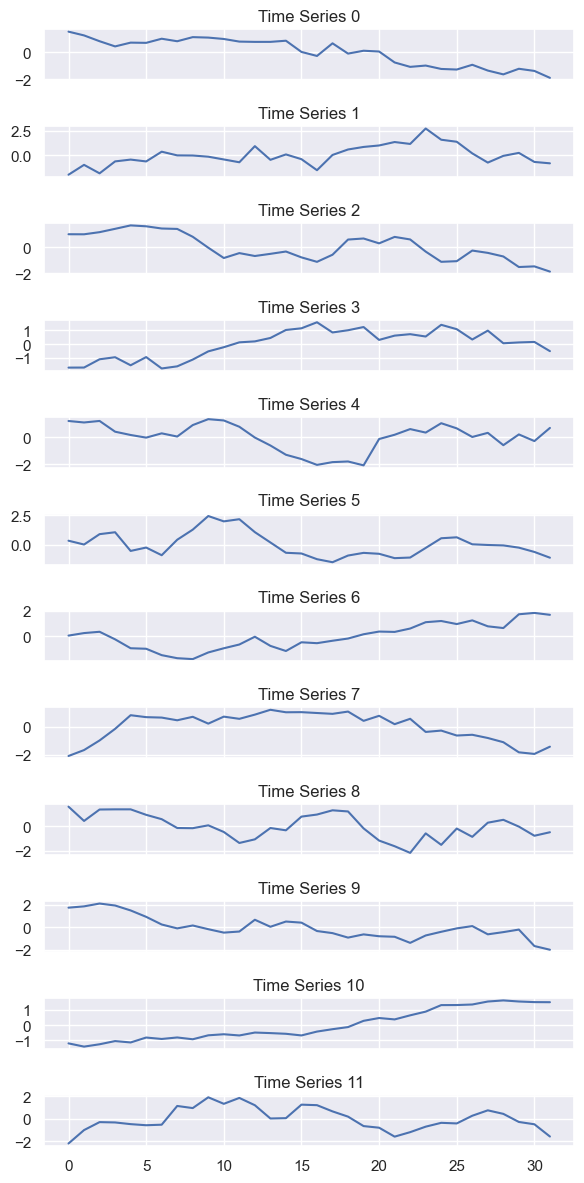

In [20]:
# Generate Time Series
X = random_walks(n_ts=12, sz=32, d=1)
X = TimeSeriesScalerMeanVariance(mu=0., std=1.).fit_transform(X)

sns.set()
fig, ax = plt.subplots(X.shape[0], 1, figsize=(6, X.shape[0]), sharex=True)
for i in range(X.shape[0]):
    ax[i].plot(X[i].ravel())
    ax[i].set_title(f'Time Series {i}')
fig.tight_layout()
fig.show()

0.064 --> 0.066 --> 


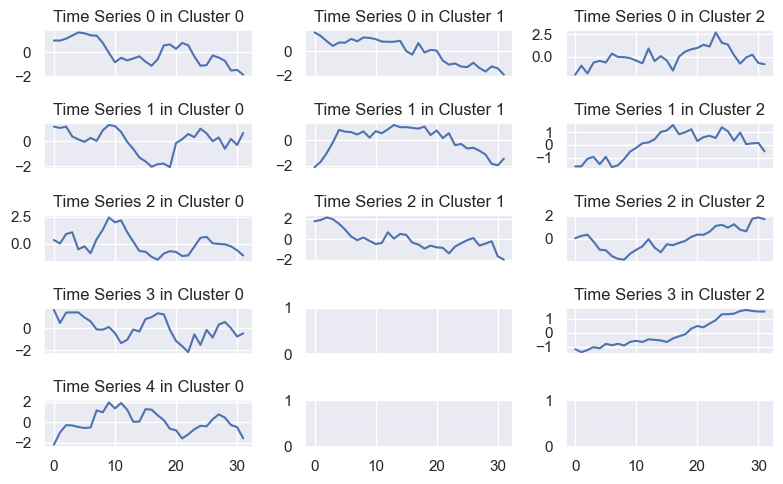

In [23]:
# Group by KShape
ks = KShape(n_clusters=3, verbose=True, random_state=0)

# Plot each cluster
y_pred = ks.fit_predict(X)

# Set n_rows to max number of ts in a cluster
n_rows = max(np.bincount(y_pred))
fig, ax = plt.subplots(n_rows, 3, figsize=(8, n_rows), sharex=True)
for i in range(3):
    for j in range(n_rows):
        if j < np.bincount(y_pred)[i]:
            ax[j, i].plot(X[y_pred == i][j].ravel())
            ax[j, i].set_title(f'Time Series {j} in Cluster {i}')
fig.tight_layout()